<a href="https://colab.research.google.com/github/SeunghyeChae/CAKD3_tmdhey/blob/main/%EB%89%B4%EC%8A%A4%EA%B8%B0%EC%82%AC%EB%B6%84%EB%A5%98(%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
keras.__version__

'2.6.0'

In [ ]:
tf.keras.__version__

'2.6.0'

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)= reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [ ]:
import pandas as pd 
pd.Series(train_labels).nunique()

46

In [ ]:
# 벡터화로 희소행렬
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
len(x_train[0])

10000

In [ ]:
# 원핫 dimension=46으로
def to_one_hot(labels,dimension=46):
  results= np.zeros((len(labels),dimension))
  for i,label in enumerate(labels):
    results[i,label] = 1.
  return results

one_hot_train_labels= to_one_hot(train_labels)
one_hot_test_labels= to_one_hot(test_labels)

In [ ]:
len(one_hot_train_labels[0])

46

In [ ]:
# keras 내장함수 
# from tensorflow.keras.utils import to_categorical 
from keras.utils.np_utils import to_categorical

one_hot_train_labels= to_categorical(train_labels)
one_hot_test_labels= to_categorical(test_labels)

In [ ]:
# output이 46개가 되어야함 
# 레이어 3개 유닛64 output은 46 -- softmax (이진분류에서는 sigmoid)

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,))) # 입력개수 안넣어줌: 가변적  -> 뭘 넣어도 64개로 출력 
model.add(layers.Dense(64, activation='relu' ))
model.add(layers.Dense(46, activation='softmax'))  # 46개중 확률이 제일 큰걸로 분류... (멀티분류= softmax)

In [ ]:
model.compile(optimizer= 'rmsprop',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data= (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 25ms/step - loss: 2.6593 - accuracy: 0.5184 - val_loss: 1.7967 - val_accuracy: 0.6350
Epoch 2/20
16/16 [==============================] - 0s 10ms/step - loss: 1.4907 - accuracy: 0.6952 - val_loss: 1.3596 - val_accuracy: 0.6960
Epoch 3/20
16/16 [==============================] - 0s 10ms/step - loss: 1.1064 - accuracy: 0.7646 - val_loss: 1.1634 - val_accuracy: 0.7530
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8693 - accuracy: 0.8188 - val_loss: 1.0477 - val_accuracy: 0.7860
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 0.6884 - accuracy: 0.8568 - val_loss: 0.9875 - val_accuracy: 0.7910
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5489 - accuracy: 0.8884 - val_loss: 0.9316 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 10ms/step - loss: 0.4397 - accuracy: 0.9093 - val_loss: 0.8777 - val_accuracy: 0.8160
Epoch 8/20
16

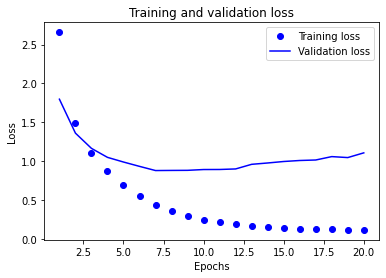

In [ ]:
import matplotlib.pyplot as plt 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs= range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

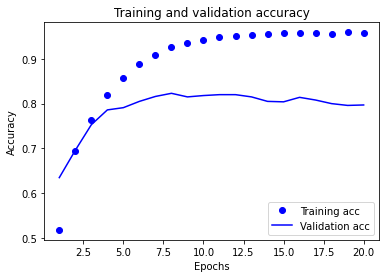

In [ ]:
plt.clf() # 그래프를 초기화

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


plt.plot(epochs, acc, 'bo',label = 'Training acc')
plt.plot(epochs, val_acc,'b',label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# 이 모델은 9번째 epoch이후에 과대적합이 시작된다.
# 9번쨰 에포크로 새로운 모델을 훈련하고 테스트 세트로 평가



In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu' ))
model.add(layers.Dense(46, activation='softmax')) 

model.compile(optimizer= 'rmsprop',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data= (x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 22ms/step - loss: 2.4888 - accuracy: 0.5457 - val_loss: 1.6718 - val_accuracy: 0.6510
Epoch 2/9
16/16 [==============================] - 0s 11ms/step - loss: 1.4121 - accuracy: 0.7040 - val_loss: 1.3146 - val_accuracy: 0.7130
Epoch 3/9
16/16 [==============================] - 0s 11ms/step - loss: 1.0675 - accuracy: 0.7657 - val_loss: 1.1349 - val_accuracy: 0.7530
Epoch 4/9
16/16 [==============================] - 0s 11ms/step - loss: 0.8399 - accuracy: 0.8178 - val_loss: 1.0456 - val_accuracy: 0.7700
Epoch 5/9
16/16 [==============================] - 0s 11ms/step - loss: 0.6667 - accuracy: 0.8566 - val_loss: 0.9721 - val_accuracy: 0.7970
Epoch 6/9
16/16 [==============================] - 0s 11ms/step - loss: 0.5360 - accuracy: 0.8890 - val_loss: 0.9224 - val_accuracy: 0.8160
Epoch 7/9
16/16 [==============================] - 0s 10ms/step - loss: 0.4276 - accuracy: 0.9119 - val_loss: 0.8942 - val_accuracy: 0.8150
Epoch 8/9
16/16 [===

In [ ]:
results

[0.9753450751304626, 0.7862867116928101]

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array))/len(test_labels)

0.19100623330365094

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

0.9999999

In [ ]:
np.argmax(predictions[0])

3

In [ ]:
# 출력 64 -> 4개 :: 병목이 생김 
# 두번째 레이어의 출력: 4로 해서 돌려보기 
# epochs 20 batch 128

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu' ))
model.add(layers.Dense(46, activation='softmax')) 

model.compile(optimizer= 'rmsprop',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data= (x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
63/63 [==============================] - 1s 7ms/step - loss: 3.3784 - accuracy: 0.1901 - val_loss: 2.8758 - val_accuracy: 0.2210
Epoch 2/20
63/63 [==============================] - 0s 4ms/step - loss: 2.4380 - accuracy: 0.3101 - val_loss: 2.0099 - val_accuracy: 0.5670
Epoch 3/20
63/63 [==============================] - 0s 4ms/step - loss: 1.6753 - accuracy: 0.6045 - val_loss: 1.6069 - val_accuracy: 0.6260
Epoch 4/20
63/63 [==============================] - 0s 4ms/step - loss: 1.3788 - accuracy: 0.6566 - val_loss: 1.4676 - val_accuracy: 0.6400
Epoch 5/20
63/63 [==============================] - 0s 4ms/step - loss: 1.2109 - accuracy: 0.6853 - val_loss: 1.4006 - val_accuracy: 0.6630
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 1.0793 - accuracy: 0.7177 - val_loss: 1.3670 - val_accuracy: 0.6700
Epoch 7/20
63/63 [==============================] - 0s 4ms/step - loss: 0.9689 - accuracy: 0.7413 - val_loss: 1.3399 - val_accuracy: 0.7080
Epoch 8/20
63/63 [==

In [ ]:
results

[2.15029239654541, 0.700801432132721]